In [1]:
%matplotlib notebook
from beam_solver.data import DATA_PATH
import beam_solver.catdata as cd
import beam_solver.beamsolve as bs
import beam_solver.beam_utils as bt
import nose.tools as nt
import numpy as np
import aipy
import os
import copy
import pylab
from collections import OrderedDict
import time
import linsolve
import healpy as hp
%load_ext autoreload

In [2]:
catxx =  os.path.join(DATA_PATH , 'srcd_xx.h5')
catyy =  os.path.join(DATA_PATH , 'srcd_yy.h5')

catd_xx = cd.catData()
catd_xx.read_hdf5(catxx)

catd_yy = cd.catData()
catd_yy.read_hdf5(catyy)

In [5]:
beamfits = os.path.join(DATA_PATH, 'HERA_NF_dipole_power.beamfits')
beam_xx = bt.get_fitsbeam(beamfits, 151e6, 'xx')
beam_yy = bt.get_fitsbeam(beamfits, 151e6, 'yy')

<IPython.core.display.Javascript object>


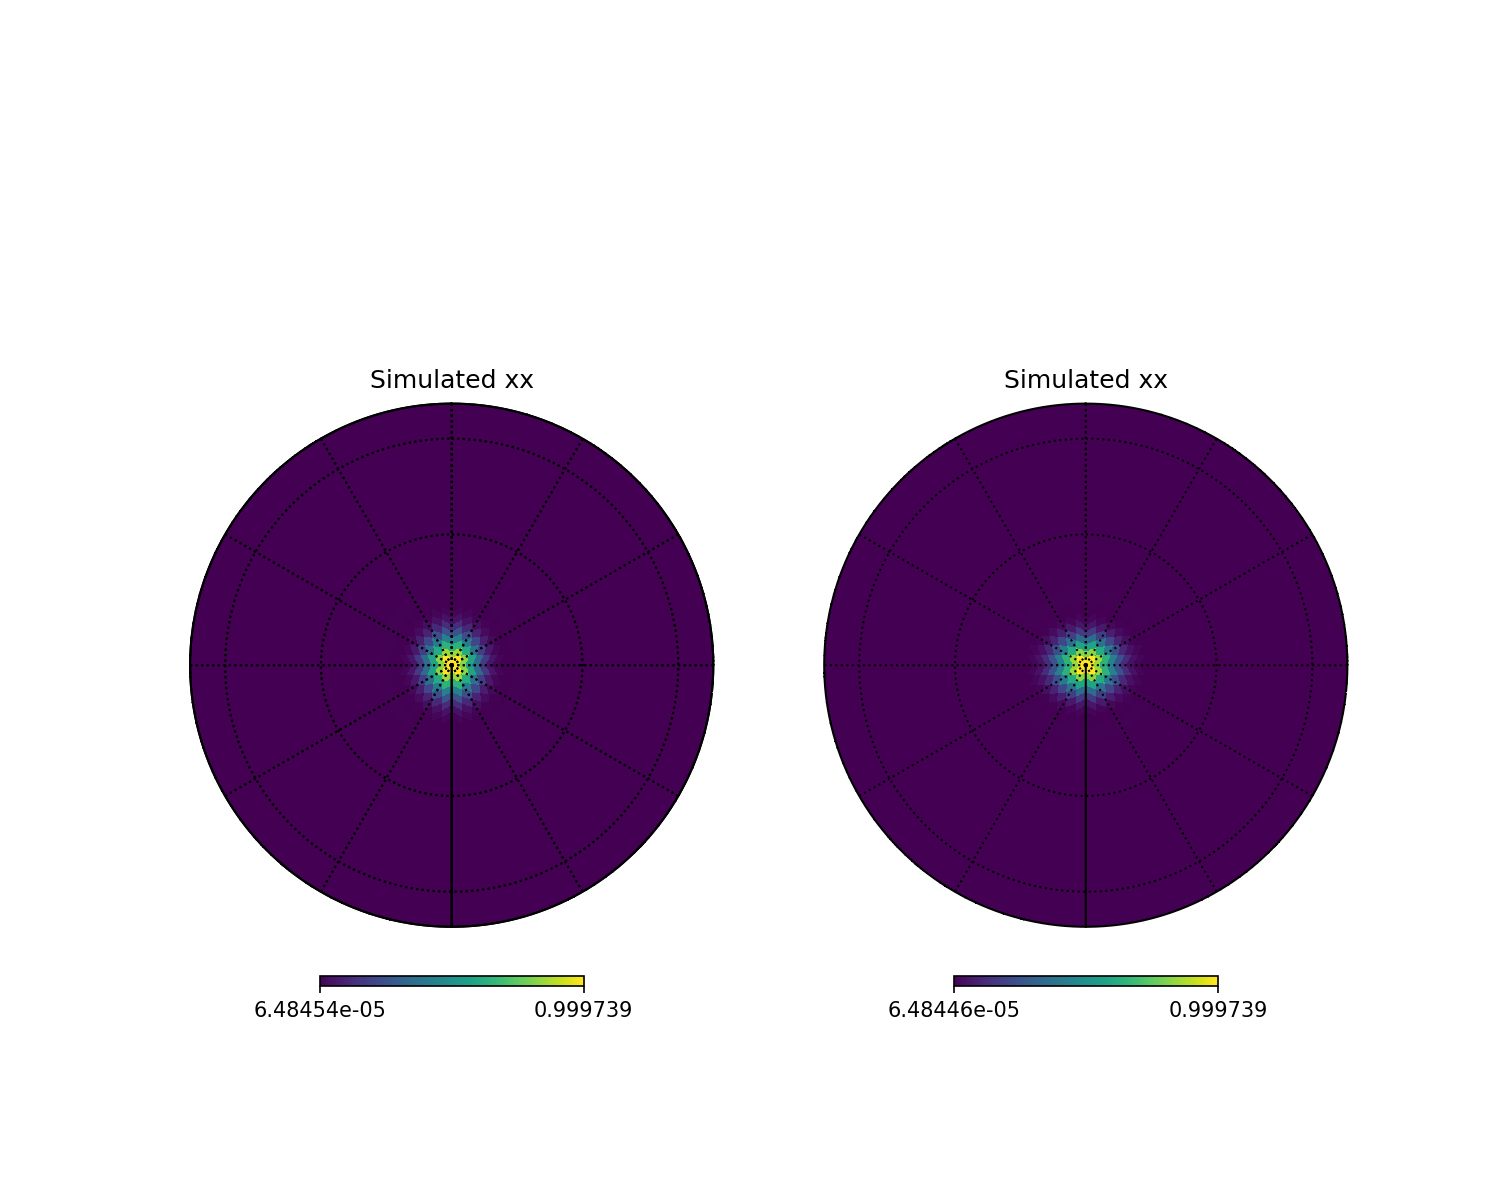

Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
Casting complex values to real discards the imaginary part


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


invalid value encountered in greater
invalid value encountered in greater


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [6]:
#cmap = cm.jet
#cmap.set_under('w')
fig, (ax1, ax2) = pylab.subplots(ncols=2, figsize=(10,8))

pylab.axes(ax1)
beam2d_xx = hp.orthview(beam_xx, rot=[0,90], half_sky=True, hold=True, title='Simulated xx', return_projected_map=True)
hp.graticule()

pylab.axes(ax2)
beam2d_yy = hp.orthview(beam_yy, rot=[0,90], half_sky=True, hold=True, title='Simulated xx', return_projected_map=True)
hp.graticule()

In [7]:
catalog_flux_xx = catd_xx.calc_catalog_flux(beam_xx, 'xx')
catalog_flux_yy = catd_yy.calc_catalog_flux(beam_yy, 'yy')
print catalog_flux_xx.shape

Casting complex values to real discards the imaginary part


(120,)


In [8]:
bms_xx = bs.BeamOnly(catd_xx, bm_pix=60)
bms_xx.construct_sys(catalog_flux=catalog_flux_xx)
sol_xx = bms_xx.solve()

bms_yy = bs.BeamOnly(catd_yy, bm_pix=60)
bms_yy.construct_sys(catalog_flux=catalog_flux_yy)
sol_yy = bms_yy.solve()

Solving 0/1
Solving 0/1


<IPython.core.display.Javascript object>


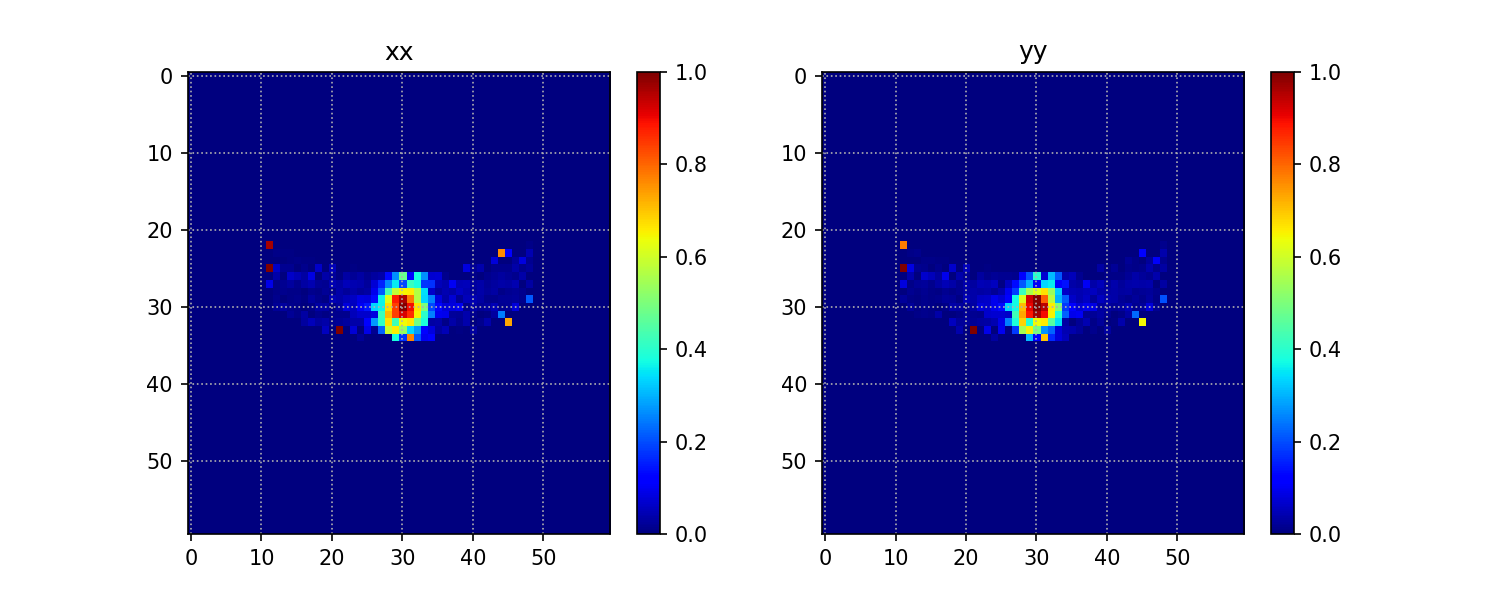

In [81]:
obsbeam_xx = bms_xx.eval_sol(sol_xx)
obsbeam_yy = bms_yy.eval_sol(sol_yy)

pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('xx')
pylab.imshow(obsbeam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('yy')
pylab.imshow(obsbeam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')


In [91]:
cleanbeam_xx = bms_xx.remove_degen(bms_xx.ls, obsbeam_xx)
cleanbeam_yy = bms_yy.remove_degen(bms_yy.ls, obsbeam_yy)

Removing all eigen modes above 327
Removing all eigen modes above 327


<IPython.core.display.Javascript object>


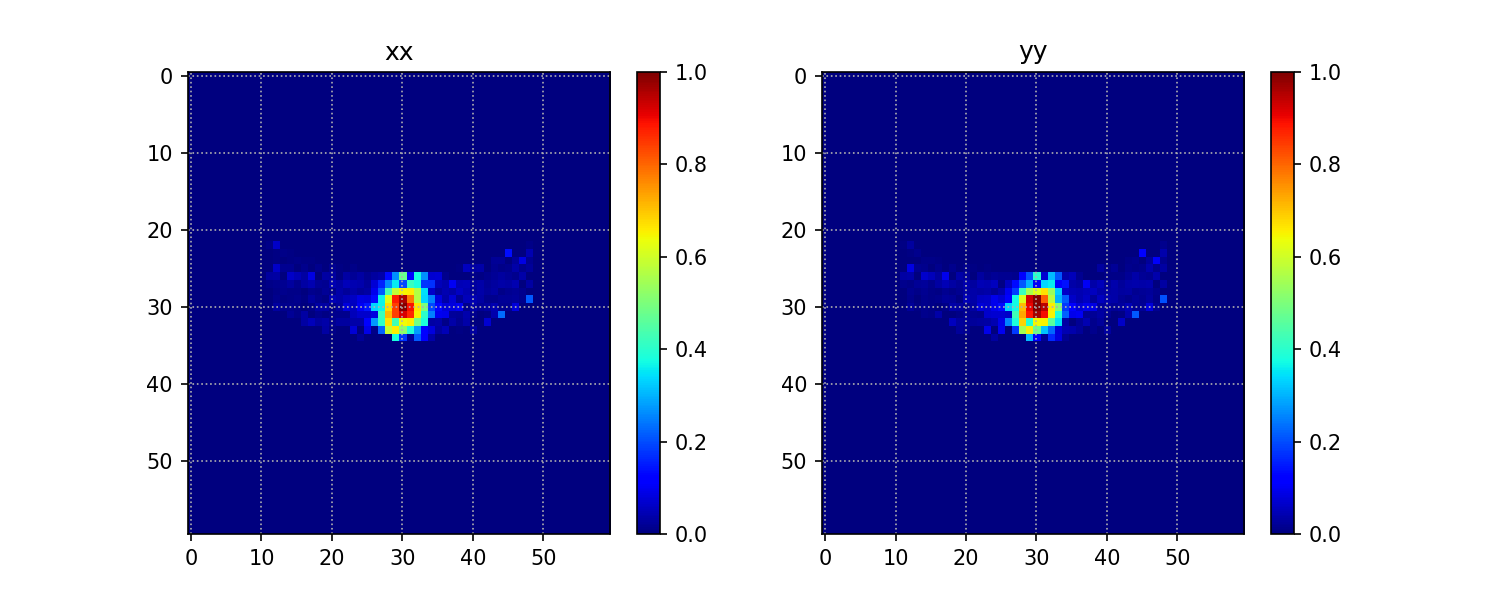

In [92]:
pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('xx')
pylab.imshow(cleanbeam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('yy')
pylab.imshow(cleanbeam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')


<IPython.core.display.Javascript object>


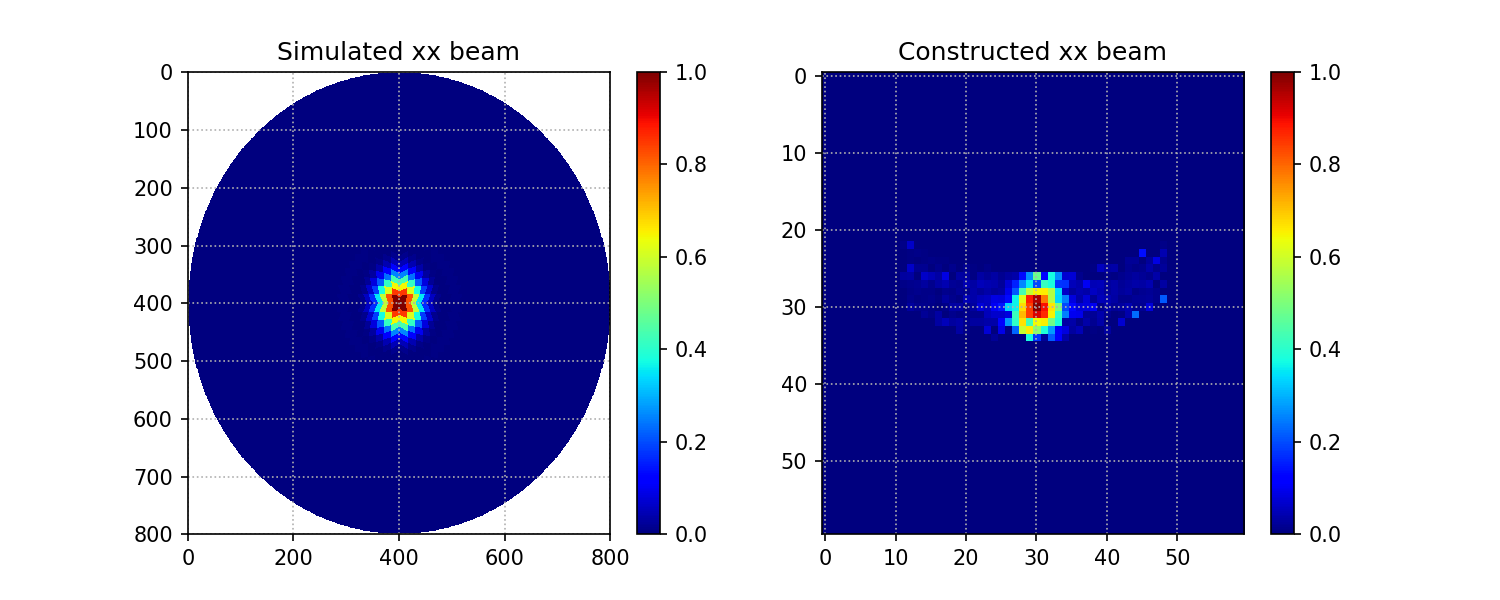

In [84]:
pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('Simulated xx beam')
pylab.imshow(beam2d_xx, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('Constructed xx beam')
pylab.imshow(cleanbeam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

<IPython.core.display.Javascript object>


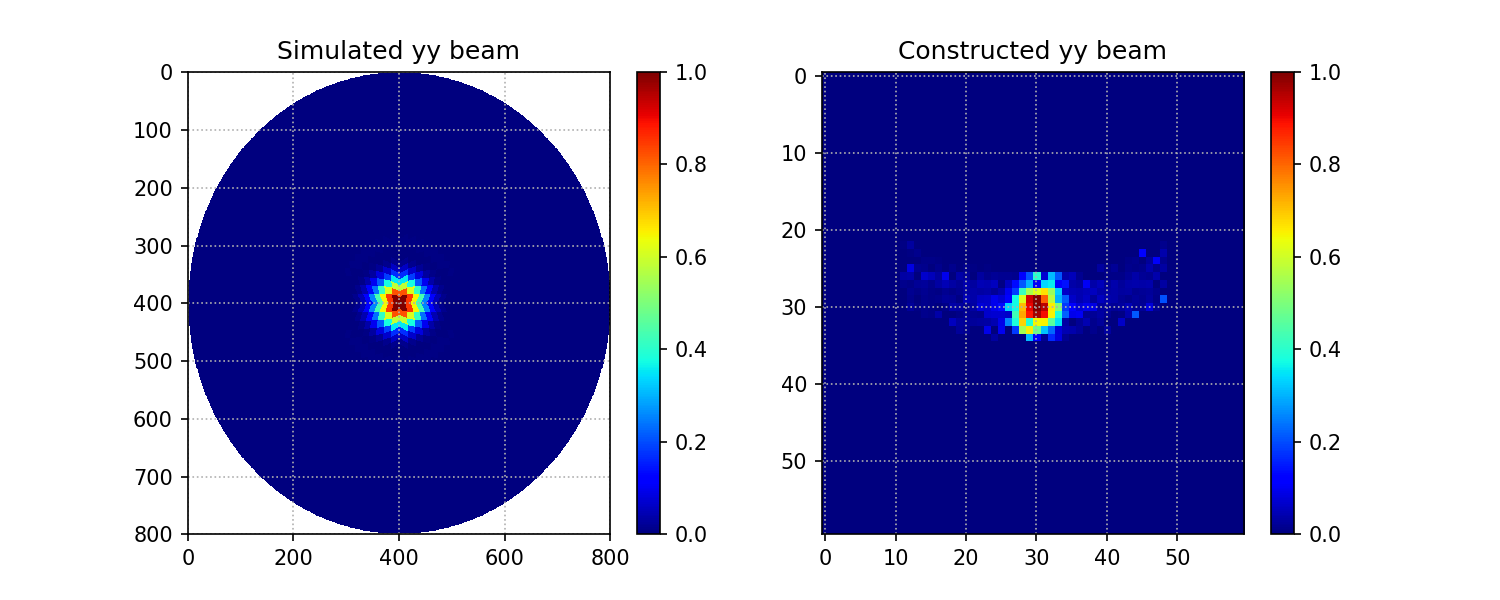

In [85]:
pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('Simulated yy beam')
pylab.imshow(beam2d_yy, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('Constructed yy beam')
pylab.imshow(cleanbeam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

In [52]:
theta = np.linspace(-90, 90, 800) # altitude
phi = np.linspace(-180, 180, 800) # azimuth

theta0 = np.linspace(-90, 90, 60) # altitude
phi0 = np.linspace(-180, 180, 60) # azimuth

<IPython.core.display.Javascript object>


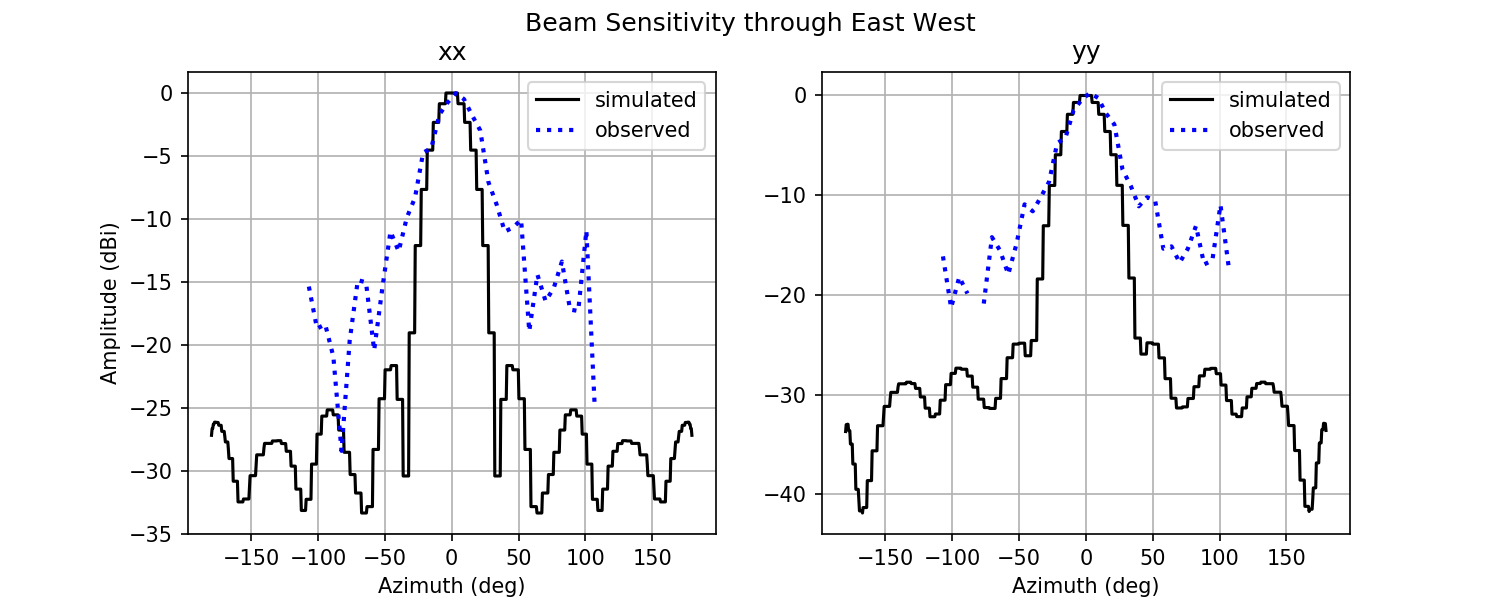

invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10


In [93]:
fig = pylab.figure(figsize=(10,4))
pylab.suptitle('Beam Sensitivity through East West')
pylab.subplot(121)
pylab.title('xx')
pylab.plot(phi, 10*np.log10(beam2d_xx[400,:]), 'k', label='simulated')
pylab.plot(phi0, 10*np.log10(cleanbeam_xx[:, 30]), 'b', ls='dotted', label='observed', linewidth=2)
pylab.ylabel('Amplitude (dBi)')
pylab.xlabel('Azimuth (deg)')
pylab.legend()
pylab.grid()

pylab.subplot(122)
pylab.title('yy')
pylab.plot(phi, 10*np.log10(beam2d_yy[400,:]), 'k', label='simulated')
pylab.plot(phi0, 10*np.log10(cleanbeam_yy[:, 30]), 'b', ls='dotted', label='observed', linewidth=2)
pylab.xlabel('Azimuth (deg)')
pylab.legend()
pylab.grid()

<IPython.core.display.Javascript object>


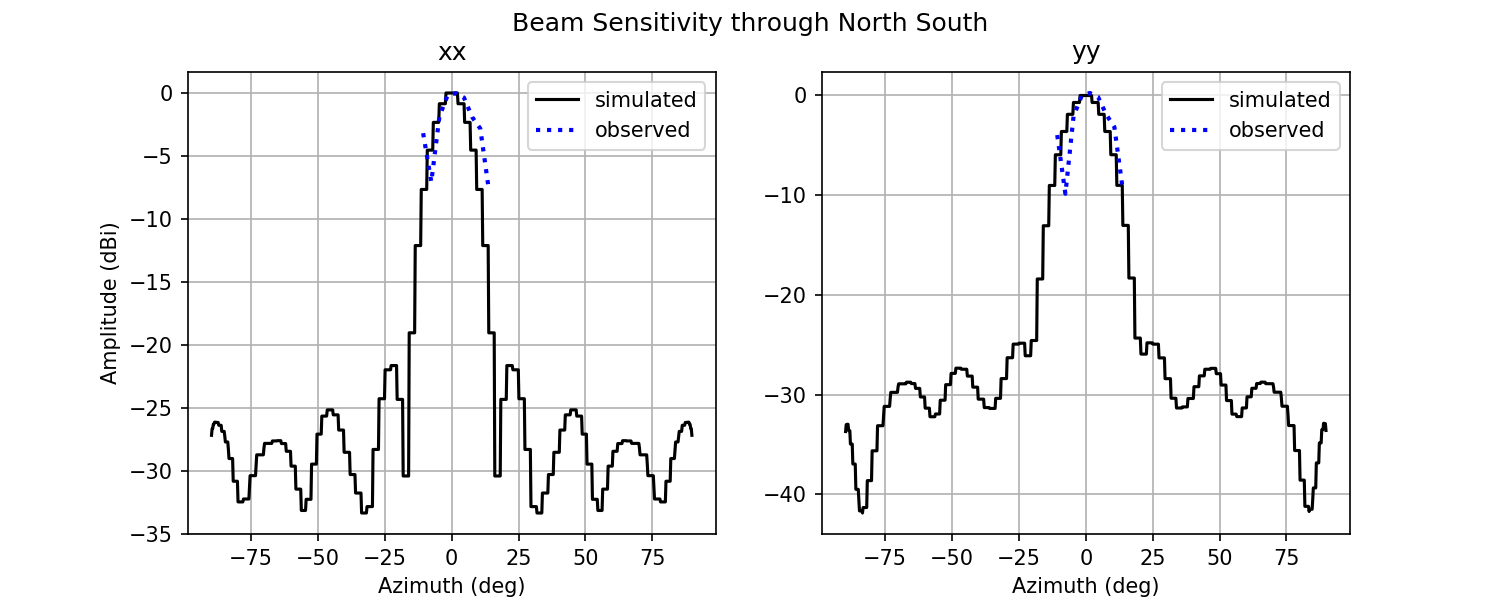

invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10


In [94]:
fig = pylab.figure(figsize=(10,4))
pylab.suptitle('Beam Sensitivity through North South')
pylab.subplot(121)
pylab.title('xx')
pylab.plot(theta, 10*np.log10(beam2d_xx[400,:]), 'k', label='simulated')
pylab.plot(theta0, 10*np.log10(cleanbeam_xx[30, :]), 'b', ls='dotted', label='observed', linewidth=2)
pylab.ylabel('Amplitude (dBi)')
pylab.xlabel('Azimuth (deg)')
pylab.legend()
pylab.grid()

pylab.subplot(122)
pylab.title('yy')
pylab.plot(theta, 10*np.log10(beam2d_yy[400,:]), 'k', label='simulated')
pylab.plot(theta0, 10*np.log10(cleanbeam_yy[30, :]), 'b', ls='dotted', label='observed', linewidth=2)
pylab.xlabel('Azimuth (deg)')
pylab.legend()
pylab.grid()

In [95]:
peakxx_ratio = beam2d_xx[400,400] / cleanbeam_xx[30, 30] 
peakyy_ratio = beam2d_yy[400,400] / cleanbeam_yy[30, 30]

peakxx_diff = np.abs(beam2d_xx[400,400] -  cleanbeam_xx[30, 30]) /  cleanbeam_xx[30, 30] * 100
peakyy_diff = np.abs(beam2d_yy[400,400] - cleanbeam_yy[30, 30]) / cleanbeam_yy[30, 30] * 100
print 'PEAK RATIO'
print 'xx : ', peakxx_ratio
print 'yy : ', peakyy_ratio

print 'PEAK RATIO'
print 'xx : ', peakxx_diff, '%'
print 'yy : ', peakyy_diff, '%'


PEAK RATIO
xx :  1.0046290561828735
yy :  0.9438594680414302
PEAK RATIO
xx :  0.4629056182873391 %
yy :  5.614053195856979 %


# Cross polarizations

In [9]:
catpol = os.path.join(DATA_PATH , 'polsrcd.h5')
catd_pol = cd.catData()
catd_pol.read_hdf5(catpol)

catalog_flux_xx = catd_pol.calc_catalog_flux(beam_xx, 'xx')
catalog_flux_yy = catd_pol.calc_catalog_flux(beam_yy, 'yy')

In [74]:
bms_xx = bs.BeamOnlyCross(cat=catd_pol)
bms_xx.construct_sys(catalog_flux_xx=catalog_flux_xx, catalog_flux_yy=catalog_flux_yy, flip_yy=[-1], theta_yy=[np.pi/2])
sol_xx = bms_xx.solve()

bms_yy = bs.BeamOnlyCross(catd_pol, bm_pix=60)
bms_yy.construct_sys(catalog_flux_xx=catalog_flux_xx, catalog_flux_yy=catalog_flux_yy, theta_xx=[np.pi/2], theta_yy=[0], flip_xx=[-1])
sol_yy = bms_yy.solve()

Solving 0/1
Solving 0/1


<IPython.core.display.Javascript object>


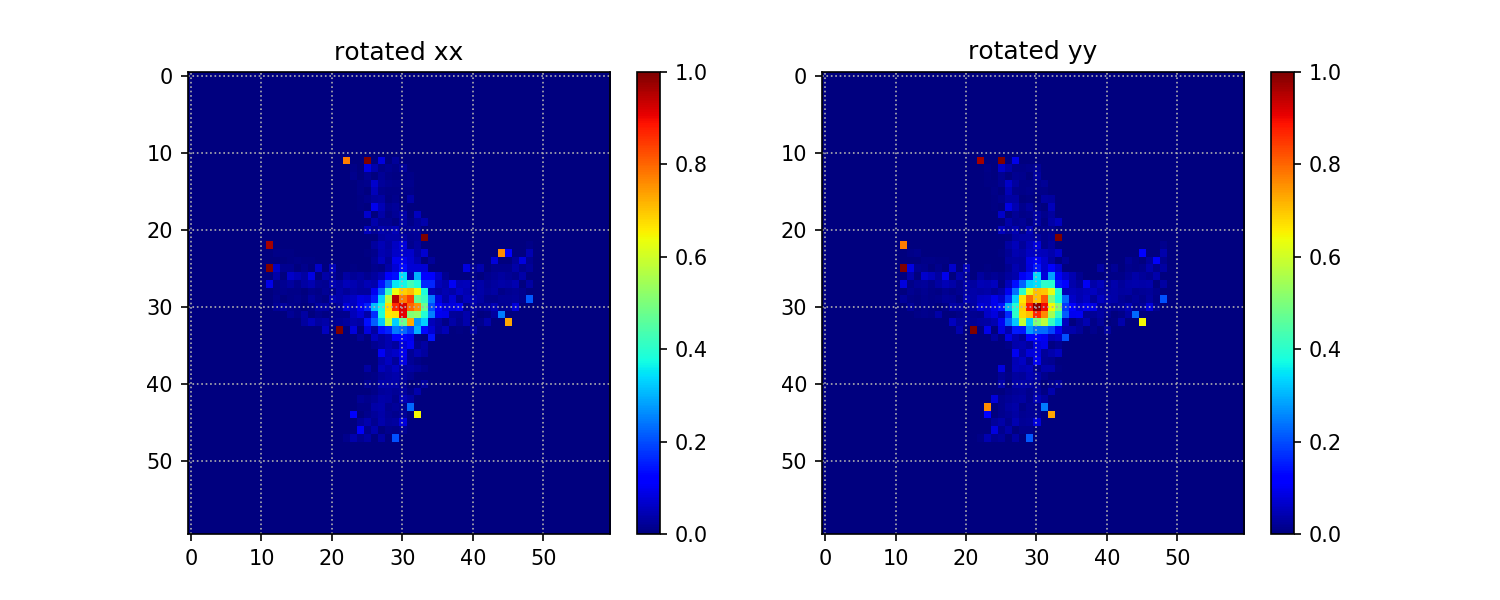

In [75]:
obsbeam_xx = bms_xx.eval_sol(sol_xx)
obsbeam_yy = bms_yy.eval_sol(sol_yy)

pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('rotated xx')
pylab.imshow(obsbeam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('rotated yy')
pylab.imshow(obsbeam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

In [77]:
cleanbeam_xx = bms_xx.remove_degen(bms_xx.ls, obsbeam_xx)
cleanbeam_yy = bms_yy.remove_degen(bms_yy.ls, obsbeam_yy)

Removing all eigen modes above 567
Removing all eigen modes above 567


<IPython.core.display.Javascript object>


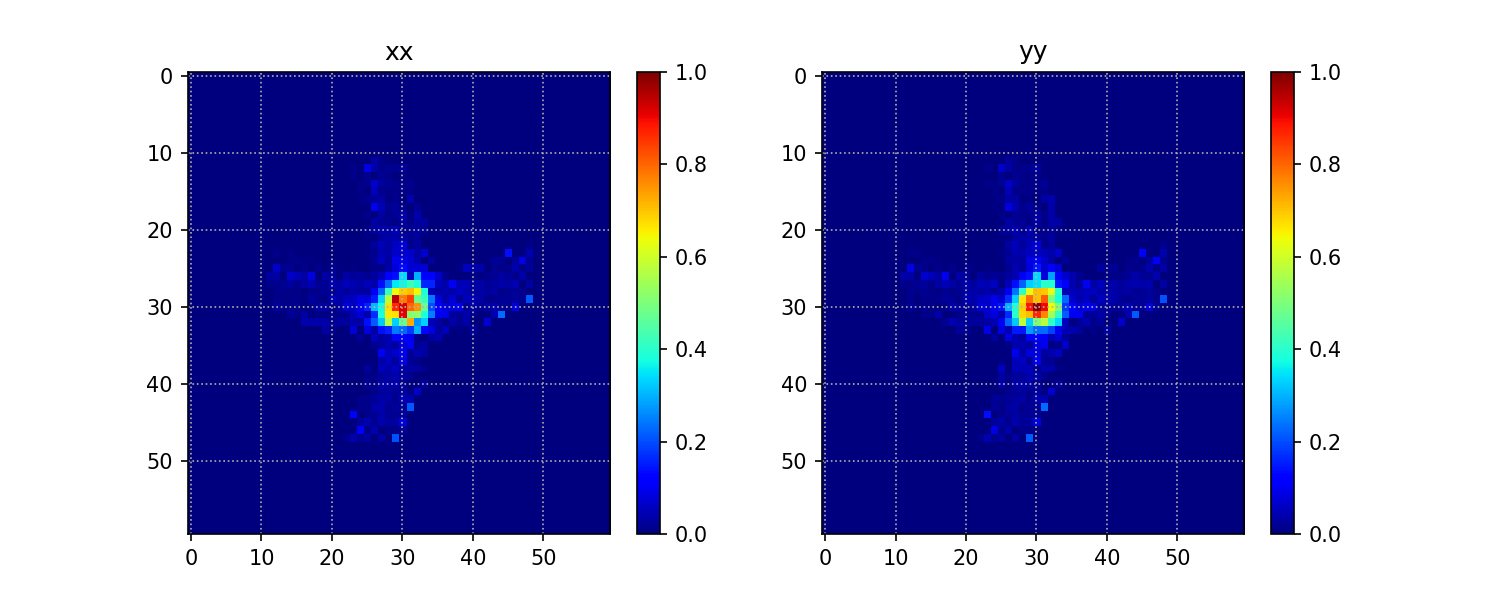

In [78]:
pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('xx')
pylab.imshow(cleanbeam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('yy')
pylab.imshow(cleanbeam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

<IPython.core.display.Javascript object>


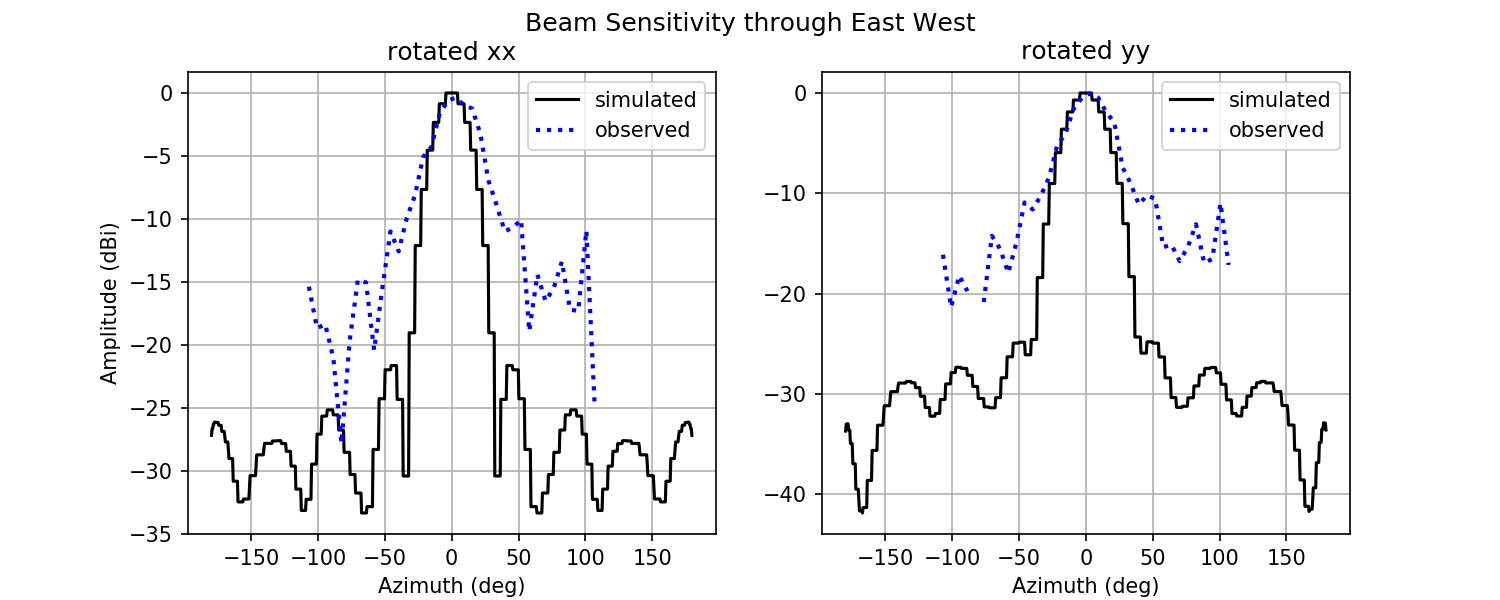

invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10


In [62]:
fig = pylab.figure(figsize=(10,4))
pylab.suptitle('Beam Sensitivity through East West')
pylab.subplot(121)
pylab.title('rotated xx')
pylab.plot(phi, 10*np.log10(beam2d_xx[400,:]), 'k', label='simulated')
pylab.plot(phi0, 10*np.log10(cleanbeam_xx[:, 30]), 'b', ls='dotted', label='observed', linewidth=2)
pylab.ylabel('Amplitude (dBi)')
pylab.xlabel('Azimuth (deg)')
pylab.legend()
pylab.grid()

pylab.subplot(122)
pylab.title('rotated yy')
pylab.plot(phi, 10*np.log10(beam2d_yy[400,:]), 'k', label='simulated')
pylab.plot(phi0, 10*np.log10(cleanbeam_yy[:, 30]), 'b', ls='dotted', label='observed', linewidth=2)
pylab.xlabel('Azimuth (deg)')
pylab.legend()
pylab.grid()

<IPython.core.display.Javascript object>


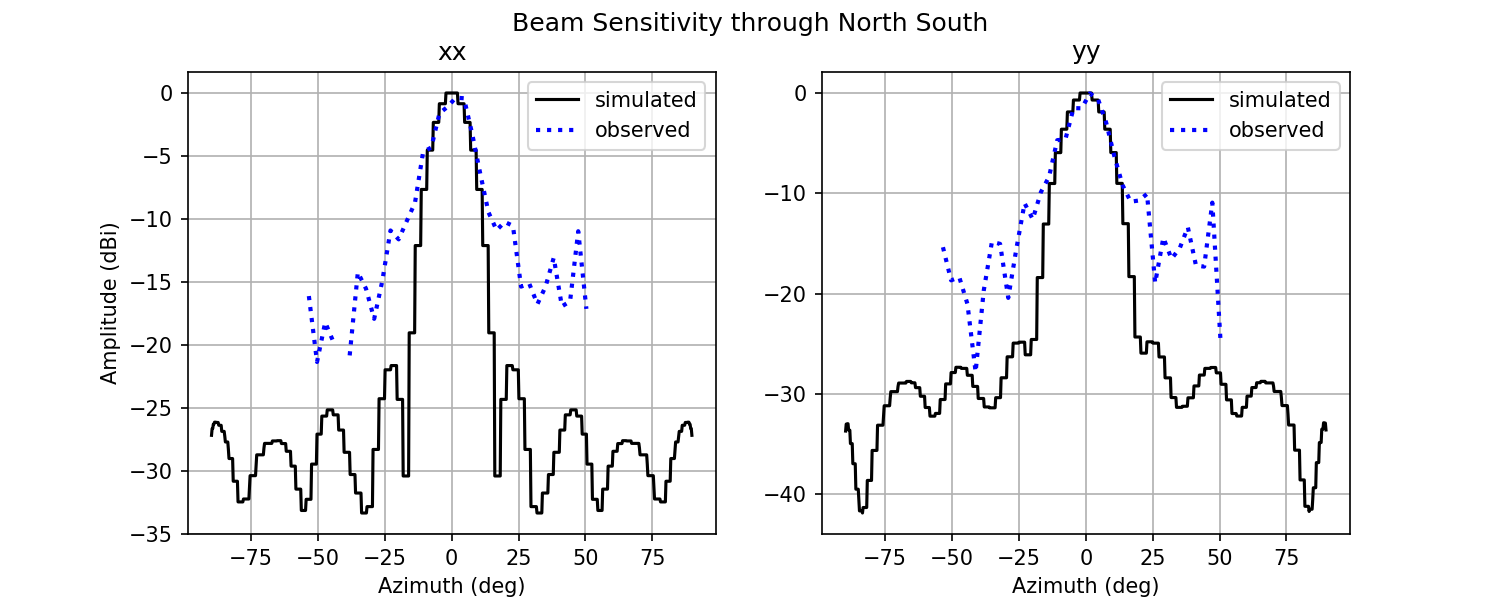

invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10


In [64]:
fig = pylab.figure(figsize=(10,4))
pylab.suptitle('Beam Sensitivity through North South')
pylab.subplot(121)
pylab.title('xx')
pylab.plot(theta, 10*np.log10(beam2d_xx[400,:]), 'k', label='simulated')
pylab.plot(theta0, 10*np.log10(cleanbeam_xx[30, :]), 'b', ls='dotted', label='observed', linewidth=2)
pylab.ylabel('Amplitude (dBi)')
pylab.xlabel('Azimuth (deg)')
pylab.legend()
pylab.grid()

pylab.subplot(122)
pylab.title('yy')
pylab.plot(theta, 10*np.log10(beam2d_yy[400,:]), 'k', label='simulated')
pylab.plot(theta0, 10*np.log10(cleanbeam_yy[30, :]), 'b', ls='dotted', label='observed', linewidth=2)
pylab.xlabel('Azimuth (deg)')
pylab.legend()
pylab.grid()

In [79]:
peakxx_ratio = beam2d_xx[400,400] / cleanbeam_xx[30, 30] 
peakyy_ratio = beam2d_yy[400,400] / cleanbeam_yy[30, 30]

peakxx_diff = (beam2d_xx[400,400] -  cleanbeam_xx[30, 30]) /  cleanbeam_xx[30, 30] * 100
peakyy_diff = (beam2d_yy[400,400] - cleanbeam_yy[30, 30]) / cleanbeam_yy[30, 30] * 100
print 'PEAK RATIO'
print 'xx : ', peakxx_ratio
print 'yy : ', peakyy_ratio

print 'PEAK RATIO'
print 'xx : ', peakxx_diff, '%'
print 'yy : ', peakyy_diff, '%'

PEAK RATIO
xx :  1.0888456418598538
yy :  1.0091592548434798
PEAK RATIO
xx :  8.884564185985383 %
yy :  0.9159254843479875 %
